In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from progressbar import ProgressBar
pbar = ProgressBar()

# 1. Read the file and explore it
**First, we read the file with Pandas. We will take the properties column, and normalize it. We also explore the dataframe

In [2]:
data = pd.read_json("training_mixpanel.txt")
data.head()

,event,properties
0,Purchased Product,"{'invoice_no': '536365', 'product_id': '85123A..."
1,Purchased Product,"{'invoice_no': '536365', 'product_id': '71053'..."
2,Purchased Product,"{'invoice_no': '536365', 'product_id': '22752'..."
3,Purchased Product,"{'invoice_no': '536365', 'product_id': '21730'..."
4,Purchased Product,"{'invoice_no': '536366', 'product_id': '22633'..."


In [3]:
data=data["properties"].tolist()
df = json_normalize(data)
df.head()
df.describe()

,country,customer_id,description,invoice_date,invoice_no,product_id,quantity,unit_price
0,United Kingdom,17850,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,536365,85123A,6,2.55
1,United Kingdom,17850,WHITE METAL LANTERN,12/1/2010 8:26,536365,71053,6,3.39
2,United Kingdom,17850,SET 7 BABUSHKA NESTING BOXES,12/1/2010 8:26,536365,22752,2,7.65
3,United Kingdom,17850,GLASS STAR FROSTED T-LIGHT HOLDER,12/1/2010 8:26,536365,21730,6,4.25
4,United Kingdom,17850,HAND WARMER UNION JACK,12/1/2010 8:28,536366,22633,6,1.85


,customer_id,quantity,unit_price
count,322875.000000,322875.000000,322875.000000
mean,15285.738180,12.103250,2.934132
std,1712.664883,278.315144,6.228682
min,12346.000000,-80995.000000,0.000000
25%,13952.000000,2.000000,1.250000
50%,15150.000000,5.000000,1.950000
75%,16788.000000,12.000000,3.750000
max,18287.000000,80995.000000,1100.440000


In [4]:
df["country"].unique()
df["country"].unique().size
df["customer_id"].unique().size
df.info()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Israel',
       'Finland', 'Sweden', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

37

4363

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322875 entries, 0 to 322874
Data columns (total 8 columns):
country         322875 non-null object
customer_id     322875 non-null int64
description     322875 non-null object
invoice_date    322875 non-null object
invoice_no      322875 non-null object
product_id      322875 non-null object
quantity        322875 non-null int64
unit_price      322875 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 13.5+ MB


In [5]:
df.to_csv("data")

# Explore the data
**we will explore the two quantitative variables: quantity and price. They will have many outliers, and quantity will have negative values as you will see.

{'whiskers': [<matplotlib.lines.Line2D at 0xc853a10>,
 'caps': [<matplotlib.lines.Line2D at 0xc85ae30>,
 'boxes': [<matplotlib.lines.Line2D at 0xc849ff0>],
 'medians': [<matplotlib.lines.Line2D at 0xc862c50>],
 'fliers': [<matplotlib.lines.Line2D at 0xc86bcf0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0xc879930>,
 'caps': [<matplotlib.lines.Line2D at 0xc881d50>,
 'boxes': [<matplotlib.lines.Line2D at 0xc873f10>],
 'medians': [<matplotlib.lines.Line2D at 0xc888b70>],
 'fliers': [<matplotlib.lines.Line2D at 0xc892c10>],
 'means': []}

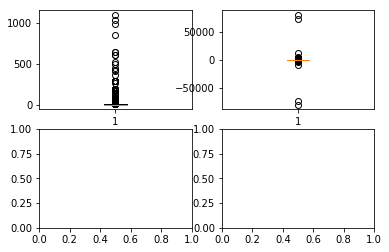

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df['unit_price'])
axs[0, 1].boxplot(df['quantity'])
plt.show()

In [7]:
(df["unit_price"]<0).sum()
df["unit_price"].size
(((df["unit_price"]<0).sum()) / df["quantity"].size)*100

0

322875

0.0

In [8]:
(df["quantity"]<0).sum()
df["quantity"].size
(((df["quantity"]<0).sum()) / df["quantity"].size)*100

6920

322875

2.143244289585753

# Clean Variables
**Outliers and negative data would affect the algorithm, so we will replace them with NaN values.We will check also that they are out after the cleaning. 

In [9]:
quantity_mean = df["quantity"].mean()
quantity_std = df["quantity"].std()
price_mean=df["unit_price"].mean()
price_std=df["unit_price"].std()

In [10]:
def remove_outliers(x, mean, std):
    if ((x-mean) > (3*std) or (x<0)):
        return np.NaN
    else: 
        return x
    
df["quantity"]=df["quantity"].apply(remove_outliers, args=(price_mean, price_std))
df["unit_price"]=df["unit_price"].apply(remove_outliers, args=(price_mean, price_std))

In [11]:
(df["unit_price"]<0).sum()
df["unit_price"].size
(((df["unit_price"]<0).sum()) / df["quantity"].size)*100

(df["quantity"]<0).sum()
df["quantity"].size
(((df["quantity"]<0).sum()) / df["quantity"].size)*100

0

322875

0.0

0

322875

0.0

In [12]:
df

,country,customer_id,description,invoice_date,invoice_no,product_id,quantity,unit_price
0,United Kingdom,17850,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,536365,85123A,6.0,2.55
1,United Kingdom,17850,WHITE METAL LANTERN,12/1/2010 8:26,536365,71053,6.0,3.39
2,United Kingdom,17850,SET 7 BABUSHKA NESTING BOXES,12/1/2010 8:26,536365,22752,2.0,7.65
3,United Kingdom,17850,GLASS STAR FROSTED T-LIGHT HOLDER,12/1/2010 8:26,536365,21730,6.0,4.25
4,United Kingdom,17850,HAND WARMER UNION JACK,12/1/2010 8:28,536366,22633,6.0,1.85
5,United Kingdom,17850,HAND WARMER RED POLKA DOT,12/1/2010 8:28,536366,22632,6.0,1.85
6,United Kingdom,13047,ASSORTED COLOUR BIRD ORNAMENT,12/1/2010 8:34,536367,84879,NaN,1.69
7,United Kingdom,13047,POPPY'S PLAYHOUSE BEDROOM,12/1/2010 8:34,536367,22745,6.0,2.10
8,United Kingdom,13047,POPPY'S PLAYHOUSE KITCHEN,12/1/2010 8:34,536367,22748,6.0,2.10
9,United Kingdom,13047,FELTCRAFT PRINCESS CHARLOTTE DOLL,12/1/2010 8:34,536367,22749,8.0,3.75


{'whiskers': [<matplotlib.lines.Line2D at 0xcad3db0>,
 'caps': [<matplotlib.lines.Line2D at 0xcae0c50>,
 'boxes': [<matplotlib.lines.Line2D at 0xcad39f0>],
 'medians': [<matplotlib.lines.Line2D at 0xcaeaa70>],
 'fliers': [<matplotlib.lines.Line2D at 0xcaf0b10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0xcaf8fb0>,
 'caps': [<matplotlib.lines.Line2D at 0xcb08af0>,
 'boxes': [<matplotlib.lines.Line2D at 0xcaf8cb0>],
 'medians': [<matplotlib.lines.Line2D at 0xcb10910>],
 'fliers': [<matplotlib.lines.Line2D at 0xcb189b0>],
 'means': []}

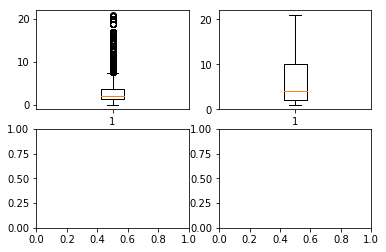

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df['unit_price'].dropna())
axs[0, 1].boxplot(df['quantity'].dropna())
plt.show()

In [14]:
matrix = pd.DataFrame(index=df["customer_id"].unique(), columns=df["product_id"].unique())

np.array([4,5,6])

In [15]:
matrix.index[1]

13047

# Prepare data
**For the algorithm I will only take in consideration the costumers, products and the product count. We could use in more complex algorithms other variables or even the descriptions, but I will keep things simple. 

**First I want construct a table in which rows are costumers, columns are products and the values are simply the quantity of the product purschased by the user. I will do it by pivoting the original dataframe, but first I will explore how many transactions are repeated and so on. 

In [16]:
matrix_count = df.pivot_table(index="customer_id", columns="product_id", values="quantity", aggfunc="count")

In [17]:
matrix_count.transpose().count().mean() #check on average how many different products each costumer has bought. 
matrix_count.transpose().count().std() 

48.97112078844832

68.30324265829951

In [18]:
matrix_count.transpose().mean().mean() 
matrix_count.transpose().mean().std() 

0.9987327333019056

0.46140120626836467

In [19]:
(matrix_count>1).sum().sum() #number of repeated transactions

43802

# Prepare data (2)
**I have seen that there are many repeated transactions (costumers who bought the same kind of product again). If I want a pivot table from the original which has unique costumers on its rows and unique products on its columns with the quantities as values, I have to use an aggregation function for the duplicated pairs in the Pivot Table. In this case, I will use evidently the sum to aggregate all the quantities.** 

In [20]:
matriz=df.pivot_table(index="customer_id", columns="product_id", values="quantity", aggfunc="sum" )
matriz

product_id,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,CRUK
customer_id,,,,,,,,,,,,,,,,,,,,,
12346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prepare Algorithm
**I will use matrix factorization, a method to reconstruct the table I have constructed before. This method can be used to fill NaN values (the quantities we want to estimate for the ratings ) I will use the implementation from Albert Au Yeung, one of the simplest I have found. In this implementation, values which are zero are considered NaNs, so I will transform NaN values in my data to fit the algorithm.**

**I do not use Sklearn because its algorithms for matrix reconstruction take in account in its cost function ALL the values in the matrix that will be reconstructed, so it makes almost a perfect reconstruction of the original matrix (not estimation of the NaN or zero values is made). However, the algorithm I have chosen takes only in account the values that are defined (not the values we don't have but we want to estimate), so it estimates the other entries, which we want to guess**

**Unfortunately I will be able only to try with 1000 iterations (5000 are recommended), and only with the predefined hyperparameters. I would have liked to try different hyperparameters configurations and more iterations to improve the performance of the algorithm but my modest computer cannot cope with it** 


In [21]:
matriz.fillna(0).values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
R=matriz.fillna(0).values
N = len(R)
M = len(R[0])
K=2
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [23]:
# Original code by Albert Au Yeung (2010)
#
# An implementation of matrix factorization
#
from progressbar import ProgressBar
pbar = ProgressBar()
###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in pbar(range(steps)):
        print(step);
        for i in (range(len(R))):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in (range(K)):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in (range(len(R))):
            for j in (range(len(R[i]))):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in (range(K)):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T


'\n@INPUT:\n    R     : a matrix to be factorized, dimension N x M\n    P     : an initial matrix of dimension N x K\n    Q     : an initial matrix of dimension M x K\n    K     : the number of latent features\n    steps : the maximum number of steps to perform the optimisation\n    alpha : the learning rate\n    beta  : the regularization parameter\n@OUTPUT:\n    the final matrices P and Q\n'

In [ ]:
#Execute 
nP, nQ = matrix_factorization(R, P, Q, K, steps=1000)
nR = np.dot(nP, nQ.T)
final_matrix=pd.DataFrame(nR, index=matriz.index, columns=matriz.columns)
final_matrix.to_csv("recommendation")